Garments Worker Productivity Dataset

The dataset was created by Abdullah Al Imran, Md Shamsur Rahim, Tanvir Ahmed in 2021 and published on UCI Machine Learning Transport.

The selected dataset focuses on manufacturing defects and various production-related factors, such as defect rate, quality score, energy consumption, and worker productivity. It aligns with United Nations Sustainable Development Goal (UNSDG) 9: Industry, Innovation, and Infrastructure by addressing aspects of industrial efficiency, sustainable production, and quality control.

The dataset contains 3,240 rows, representing different production batches or manufacturing instances, and 17 features.

Research Question: What factors contribute most to worker productivity in a manufacturing setting?

The dataset allows for an in-depth analysis of how factors like supplier quality, energy efficiency, and maintenance impact manufacturing defects, helping to identify improvements for sustainable industrial growth. ​​







In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive
/content/drive/MyDrive/Regression


In [2]:
# Load the dataset
df = pd.read_csv('garments_worker_productivity.csv')

# Display first few rows
print(df.head())

# Check dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

# Display column names
print("Column Names:", df.columns)

# Check data types
print("Data Types:\n", df.dtypes)

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [3]:
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [4]:
df.dropna(inplace=True)
print(df.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


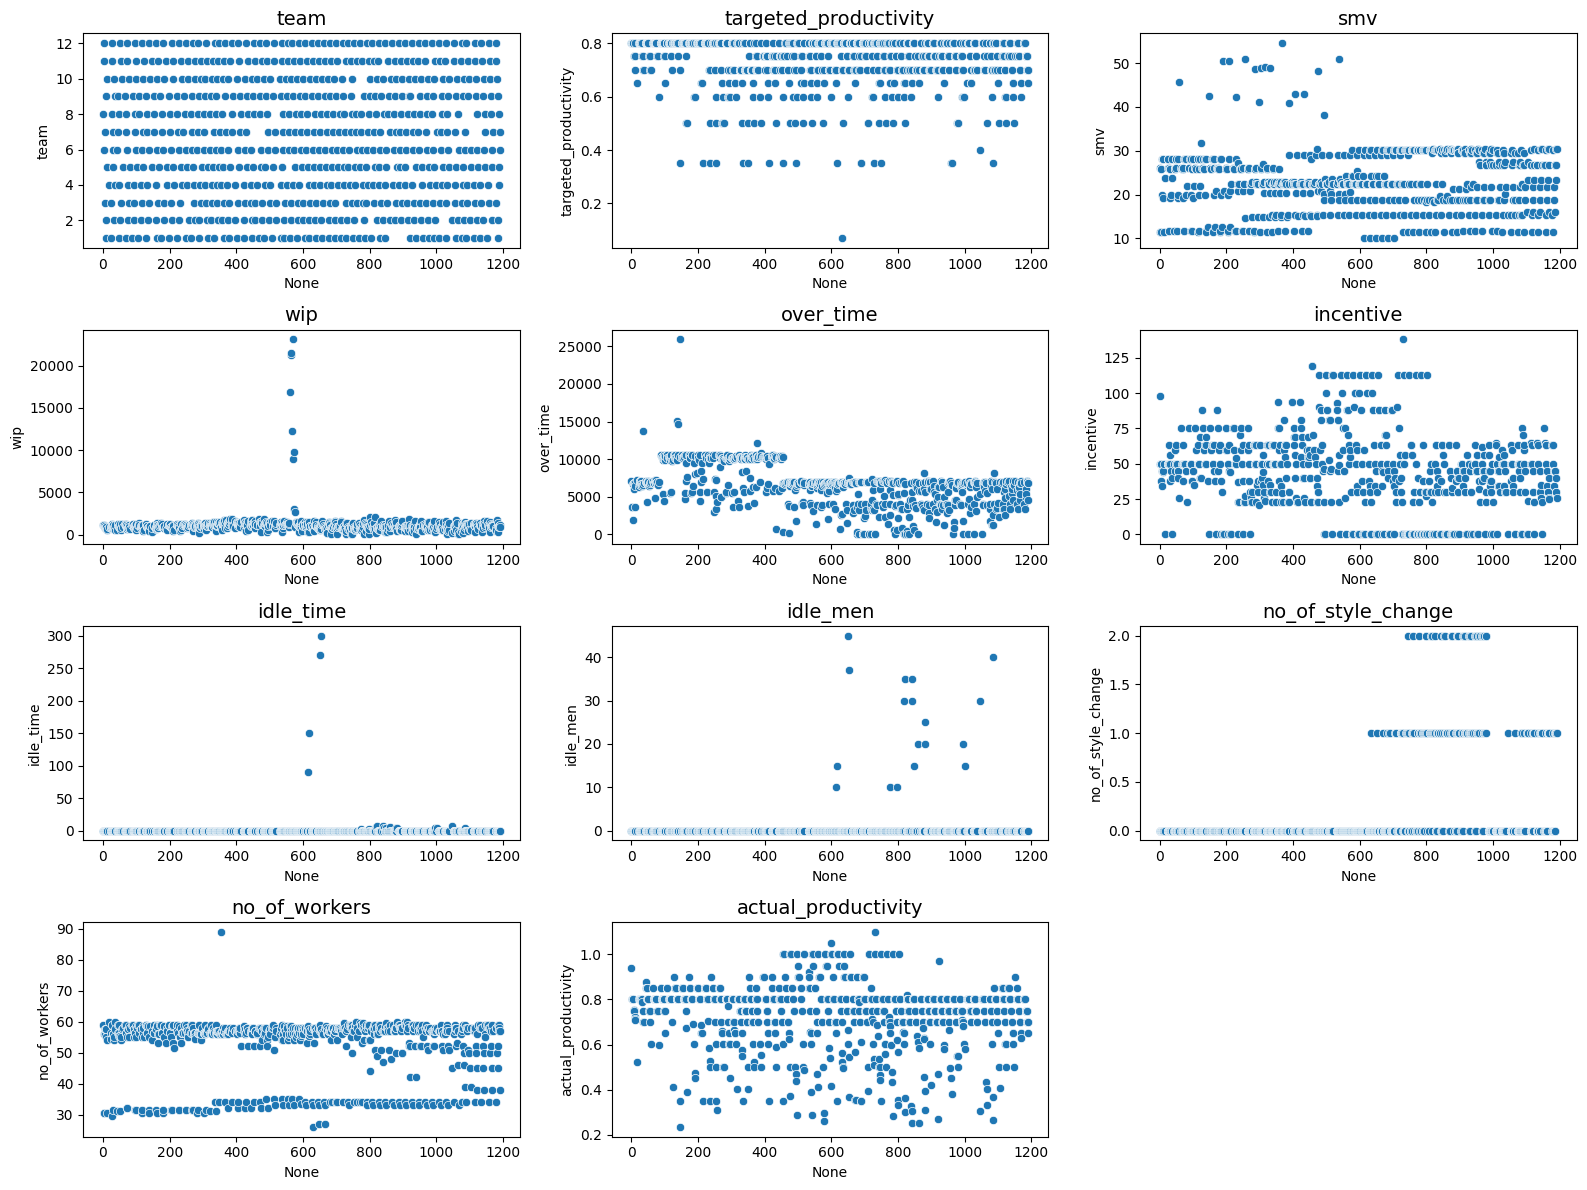

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns[:11]  # Select first 11 numeric columns

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))  # Adjusted grid for 11 plots (4x3)
axes = axes.flatten()

# Plot scatterplots for each feature
for i, column in enumerate(num_features):
    sns.scatterplot(x=df.index, y=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=14)

# Remove extra empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


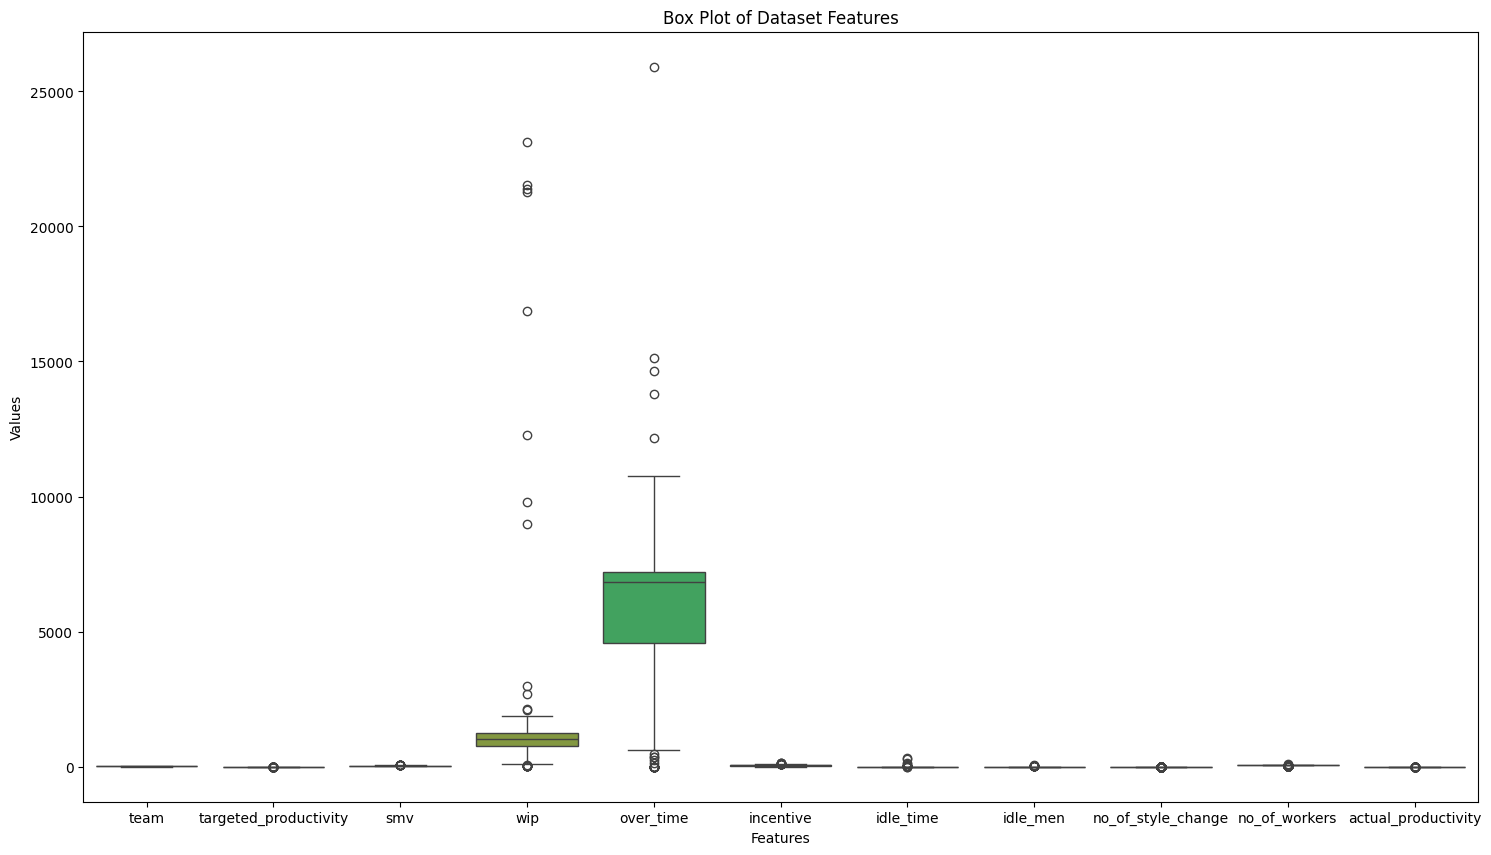

In [6]:
# Box plot for Dataset
plt.figure(figsize=(18, 10))
sns.boxplot(data=df)
plt.title("Box Plot of Dataset Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [7]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Function to clip outliers based on IQR
def clip_outliers_iqr(series):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds for clipping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the values within the bounds
    return np.clip(series, lower_bound, upper_bound)

# Select only numeric columns for clipping
df_numeric = df.select_dtypes(include=['number'])

# Apply the clipping function to numeric columns only
df_clipped = df_numeric.apply(clip_outliers_iqr)

# Optionally, you can join the clipped numeric data back to the non-numeric columns
df_clipped_full = df.join(df_clipped, rsuffix='_clipped')

# Print the clipped DataFrame
print(df_clipped_full)


           date   quarter department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1     sweing   Thursday     8                   0.80   
2      1/1/2015  Quarter1     sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1     sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1     sweing   Thursday     6                   0.80   
5      1/1/2015  Quarter1     sweing   Thursday     7                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1187  3/11/2015  Quarter2     sweing  Wednesday     4                   0.75   
1188  3/11/2015  Quarter2     sweing  Wednesday     5                   0.70   
1189  3/11/2015  Quarter2     sweing  Wednesday     8                   0.70   
1190  3/11/2015  Quarter2     sweing  Wednesday     6                   0.70   
1191  3/11/2015  Quarter2     sweing  Wednesday     7                   0.65   

        smv     wip  over_time  incenti

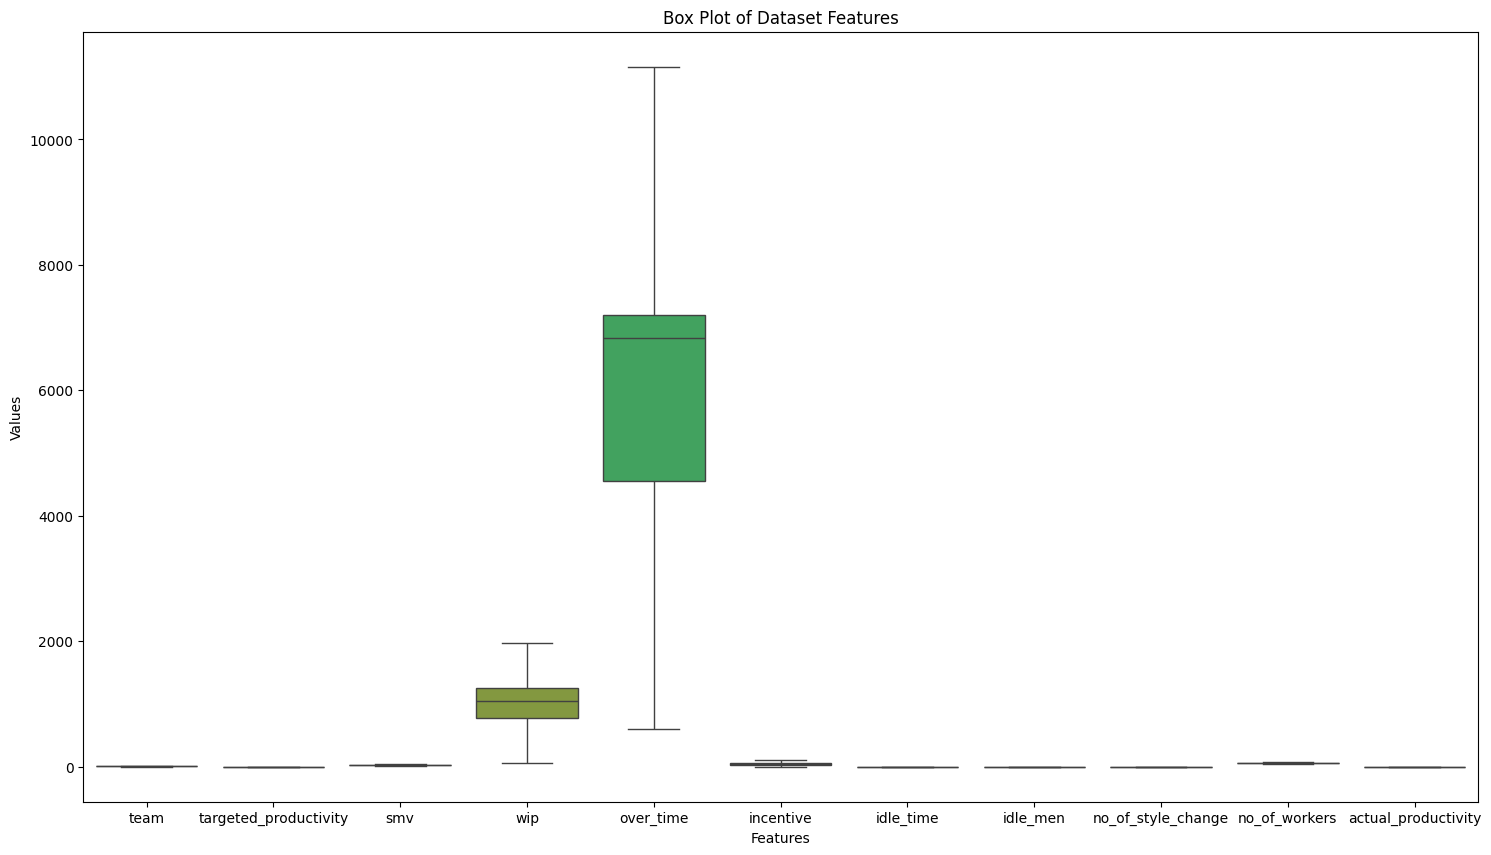

In [8]:
# Box plot for Dataset
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_clipped)
plt.title("Box Plot of Dataset Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

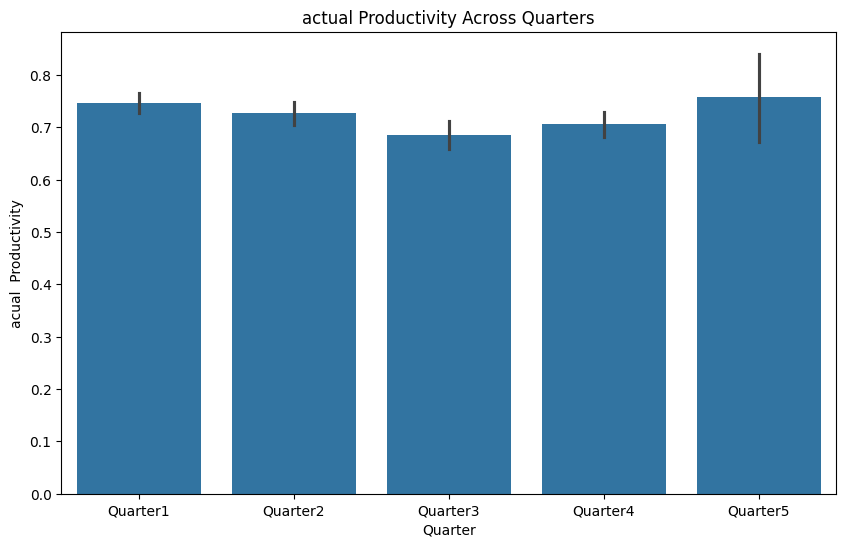

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar graph for the mean of 'targeted_productivity' across different quarters
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='actual_productivity', data=df)
plt.title('actual Productivity Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('acual  Productivity')
plt.show()


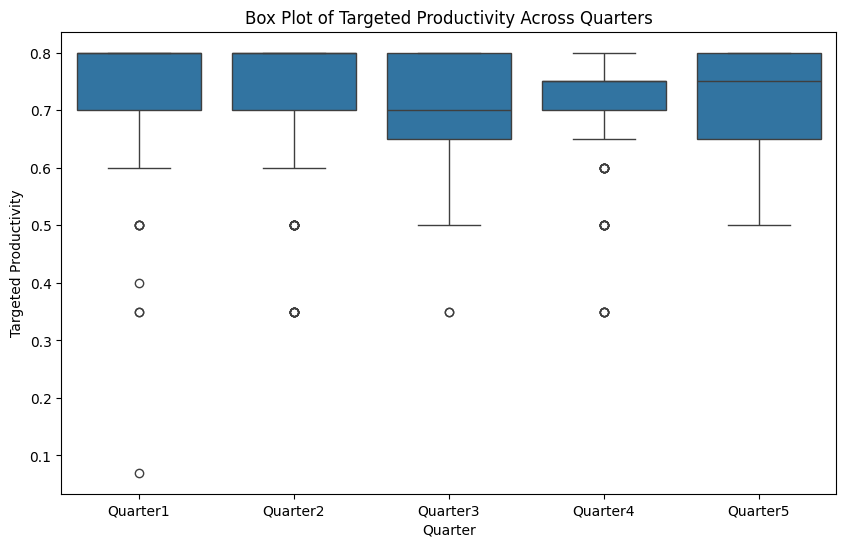

In [10]:
# Plot a box plot for 'targeted_productivity' across different quarters
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='targeted_productivity', data=df)
plt.title('Box Plot of Targeted Productivity Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Targeted Productivity')
plt.show()


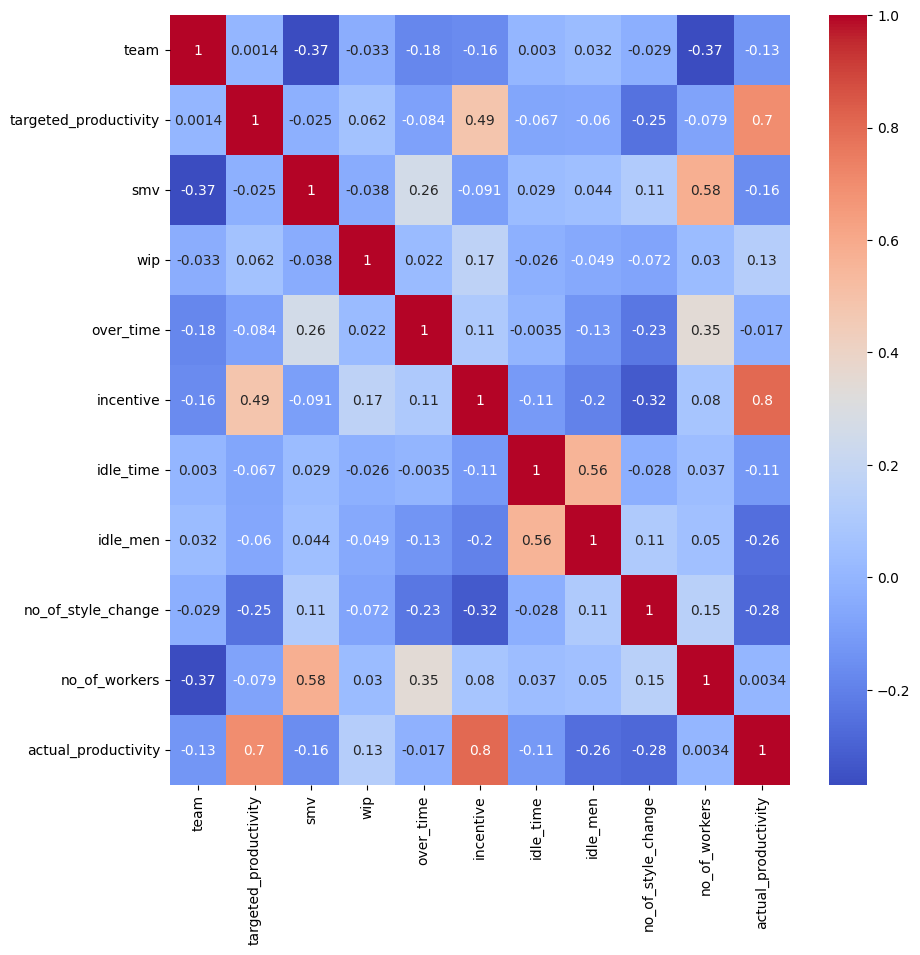

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (e.g., date columns, string columns)
df_numeric = df.select_dtypes(include=['number'])  # This selects only numeric columns

# Now plot the correlation heatmap for numeric columns only
plt.figure(figsize=(10, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


In [12]:
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Separate X and Y
X = df.drop(['actual_productivity', 'date'], axis=1)  # Drop 'date' and target column
Y = df['actual_productivity']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Avoid dummy variable trap

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Feature Scaling (Standardization) for X
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

In [14]:
#Build a Model from Scratch
# Implement Linear Regression from Scratch
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize parameters
def initialize_params(d):
    b = 0  # Bias
    w = np.zeros(d)  # Weights
    return b, w

# Linear function
def linear_function(b, w, X):
    return np.dot(X, w) + b

# Cost function (MSE)
def cost_function(Y_true, Y_pred):
    m = len(Y_true)
    return np.sum((Y_true - Y_pred) ** 2) / (2 * m)

# Gradient descent update
def update_parameters(Y_true, Y_pred, X, b, w, alpha):
    m = len(Y_true)
    dw = -np.dot(X.T, (Y_true - Y_pred)) / m
    db = -np.mean(Y_true - Y_pred)
    w -= alpha * dw
    b -= alpha * db
    return b, w

# Training function
def train_linear_regression(X_train, Y_train, n_iter=5000, alpha=0.01):
    b, w = initialize_params(X_train.shape[1])
    cost_history = []

    for i in range(n_iter):
        Y_hat = linear_function(b, w, X_train)
        cost_now = cost_function(Y_train, Y_hat)
        b, w = update_parameters(Y_train, Y_hat, X_train, b, w, alpha)
        cost_history.append(cost_now)

    return b, w, cost_history

# Train from-scratch model
b, w, cost_history = train_linear_regression(sc_X_train, Y_train, n_iter=2000, alpha=0.01)

# Predictions on training set
Y_train_pred_scratch = linear_function(b, w, sc_X_train)

# Predictions on test set
Y_test_pred_scratch = linear_function(b, w, sc_X_test)


# Evaluation on Training Set
train_mse_scratch = mean_squared_error(Y_train, Y_train_pred_scratch)
train_r2_scratch = r2_score(Y_train, Y_train_pred_scratch)
train_mae_scratch = mean_absolute_error(Y_train, Y_train_pred_scratch)

# Evaluation on Test Set
test_mse_scratch = mean_squared_error(Y_test, Y_test_pred_scratch)
test_r2_scratch = r2_score(Y_test, Y_test_pred_scratch)
test_mae_scratch = mean_absolute_error(Y_test, Y_test_pred_scratch)

# Display results
print(f"From Scratch Model - Training MSE: {train_mse_scratch:.4f}, Training R²: {train_r2_scratch:.4f}, Training MAE: {train_mae_scratch:.4f}")
print(f"From Scratch Model - Test MSE: {test_mse_scratch:.4f}, Test R²: {test_r2_scratch:.4f}, Test MAE: {test_mae_scratch:.4f}")


From Scratch Model - Training MSE: 0.0048, Training R²: 0.8068, Training MAE: 0.0440
From Scratch Model - Test MSE: 0.0041, Test R²: 0.8013, Test MAE: 0.0435


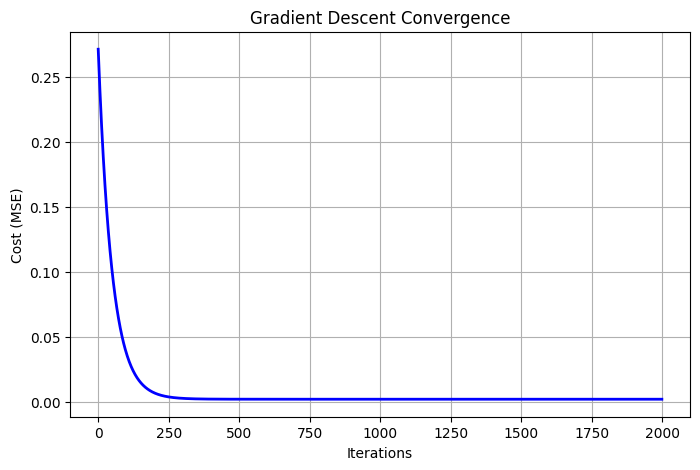

In [15]:
# Plot cost history
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.grid()
plt.show()

In [16]:
#Built Primary model for Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize Linear Regression
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, Y_train)

# Predict & Evaluate on Training Set
train_preds = linear_reg.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds)
train_r2 = r2_score(Y_train, train_preds)
train_mae = mean_absolute_error(Y_train, train_preds)

# Predict & Evaluate on Test Set
test_preds = linear_reg.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds)
test_r2 = r2_score(Y_test, test_preds)
test_mae = mean_absolute_error(Y_test, test_preds)

# Print Results
print(f"Linear Regression Training MSE: {train_mse:.4f}, Training R-squared: {train_r2:.4f}, Training MAE: {train_mae:.4f}")
print(f"Linear Regression Test MSE: {test_mse:.4f}, Test R-squared: {test_r2:.4f}, Test MAE: {test_mae:.4f}")


Linear Regression Training MSE: 0.0048, Training R-squared: 0.8068, Training MAE: 0.0440
Linear Regression Test MSE: 0.0041, Test R-squared: 0.8012, Test MAE: 0.0435


In [17]:
#Built Primary model for Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize Random Forest Regressor with hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # You can adjust these parameters

# Fit the model
rf_regressor.fit(X_train, Y_train)

# Predict & Evaluate on Training Set
train_preds = rf_regressor.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds)
train_r2 = r2_score(Y_train, train_preds)
train_mae = mean_absolute_error(Y_train, train_preds)

# Predict & Evaluate on Test Set
rf_preds = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_preds)
rf_r2 = r2_score(Y_test, rf_preds)
rf_mae = mean_absolute_error(Y_test, rf_preds)

# Print Results
print(f"Random Forest Regression Training MSE: {train_mse:.4f}, Training R-squared: {train_r2:.4f}, Training MAE: {train_mae:.4f}")
print(f"Random Forest Regression Test MSE: {rf_mse:.4f}, Test R-squared: {rf_r2:.4f}, Test MAE: {rf_mae:.4f}")


Random Forest Regression Training MSE: 0.0027, Training R-squared: 0.8887, Training MAE: 0.0302
Random Forest Regression Test MSE: 0.0037, Test R-squared: 0.8222, Test MAE: 0.0364


Random Forest outperforms Linear Regression with lower MSE and MAE, indicating better accuracy. It also has a higher R², meaning it explains more variance in the target variable. The train and test performance are close, suggesting minimal overfitting and good generalization. While Linear Regression is more interpretable, Random Forest provides better predictive power. Overall, Random Forest is the superior model based on performance and generalization.

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score

# Task 4: Hyper-parameter Optimization
# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, Y_train)
best_rf_params = rf_grid.best_params_

# Define hyperparameters for Linear Regression
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_grid = GridSearchCV(LinearRegression(), lr_params, cv=5, scoring='r2', n_jobs=-1)
lr_grid.fit(X_train, Y_train)
best_lr_params = lr_grid.best_params_

print("Best Hyperparameters for Random Forest:", best_rf_params)
print("Best Hyperparameters for Linear Regression:", best_lr_params)


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': False}


In [19]:
# Task 5: Feature Selection
feature_selector = SelectKBest(score_func=f_regression, k=10)
X_selected = feature_selector.fit_transform(X, Y)
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['team', 'targeted_productivity', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'quarter_Quarter3', 'quarter_Quarter4']


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Final Random Forest Model
rf_final = RandomForestRegressor(**best_rf_params, random_state=42)
rf_final.fit(X_train[selected_features], Y_train)
rf_test_preds = rf_final.predict(X_test[selected_features])

# Evaluation Metrics for Random Forest (Test Set)
rf_test_r2 = r2_score(Y_test, rf_test_preds)
rf_test_mse = mean_squared_error(Y_test, rf_test_preds)
rf_test_mae = mean_absolute_error(Y_test, rf_test_preds)

# Final Linear Regression Model
lr_final = LinearRegression(**best_lr_params)
lr_final.fit(X_train[selected_features], Y_train)
lr_test_preds = lr_final.predict(X_test[selected_features])

# Evaluation Metrics for Linear Regression (Test Set)
lr_test_r2 = r2_score(Y_test, lr_test_preds)
lr_test_mse = mean_squared_error(Y_test, lr_test_preds)
lr_test_mae = mean_absolute_error(Y_test, lr_test_preds)

# Print Final Results
print("Final Model Performance on Test Set:")
print(f"Random Forest - R²: {rf_test_r2:.4f}, MSE: {rf_test_mse:.4f}, MAE: {rf_test_mae:.4f}")
print(f"Linear Regression - R²: {lr_test_r2:.4f}, MSE: {lr_test_mse:.4f}, MAE: {lr_test_mae:.4f}")


Final Model Performance on Test Set:
Random Forest - R²: 0.8231, MSE: 0.0037, MAE: 0.0317
Linear Regression - R²: 0.8093, MSE: 0.0040, MAE: 0.0424


In [21]:
# Task 7: Conclusion
conclusion = f"""
Model Performance on Test Set:
- Random Forest: R² = {rf_test_r2:.4f}, MSE = {rf_test_mse:.4f}, MAE = {rf_test_mae:.4f}
- Linear Regression: R² = {lr_test_r2:.4f}, MSE = {lr_test_mse:.4f}, MAE = {lr_test_mae:.4f}

Impact of Methods:
- Hyper-parameter tuning optimized model performance by selecting the best parameters.
- Feature selection reduced dimensionality while maintaining model accuracy.

Insights and Future Directions:
- Exploring additional models (e.g., Gradient Boosting, XGBoost) could further improve performance.
- Fine-tuning feature engineering and handling outliers may enhance accuracy.
"""

print(conclusion)



Model Performance on Test Set:
- Random Forest: R² = 0.8231, MSE = 0.0037, MAE = 0.0317
- Linear Regression: R² = 0.8093, MSE = 0.0040, MAE = 0.0424

Impact of Methods:
- Hyper-parameter tuning optimized model performance by selecting the best parameters.
- Feature selection reduced dimensionality while maintaining model accuracy.

Insights and Future Directions:
- Exploring additional models (e.g., Gradient Boosting, XGBoost) could further improve performance.
- Fine-tuning feature engineering and handling outliers may enhance accuracy.

